#### testing frequency filtering properties of integrator type neurons.

In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_class import AQUA
from plotting_functions import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_frequencies(neuron, freq, dt, N_iter, x_start, t_start, I_inj):
    spike_bool = np.zeros(len(freq))
    for n, f in enumerate(freq):
        neuron.Initialise(x_start, t_start)
        _, _, spikes = neuron.update_RK2(dt, N_iter, I_inj[n])
        if len(spikes) != 0:
            spike_bool[n] = len(spikes)
    return spike_bool

In [3]:
# simulation params for every run
T = 3000   # = 3 s
dt = 0.01
N_iter = int(T/dt)
steps_per_second = int(1000/dt)
print(steps_per_second)

x_start = np.array([-50., 0., 0.])
t_start = np.array([0.])

# 10 pulses at a set frequency? Max f = 10 000 Hz, min = 5 Hz
freq = np.linspace(200, 400, 50) # frequencies in Hz
print(freq)
I_h = 250
I_inj = np.zeros((len(freq), N_iter)) # each row is a different stimulation frequency


for n, f in enumerate(freq):
    steps = int(steps_per_second/f) 
    freq[n] = steps_per_second/steps

    I_inj[n][steps_per_second : steps_per_second + 5*steps + 1 : steps] = I_h 

100000
[200.         204.08163265 208.16326531 212.24489796 216.32653061
 220.40816327 224.48979592 228.57142857 232.65306122 236.73469388
 240.81632653 244.89795918 248.97959184 253.06122449 257.14285714
 261.2244898  265.30612245 269.3877551  273.46938776 277.55102041
 281.63265306 285.71428571 289.79591837 293.87755102 297.95918367
 302.04081633 306.12244898 310.20408163 314.28571429 318.36734694
 322.44897959 326.53061224 330.6122449  334.69387755 338.7755102
 342.85714286 346.93877551 351.02040816 355.10204082 359.18367347
 363.26530612 367.34693878 371.42857143 375.51020408 379.59183673
 383.67346939 387.75510204 391.83673469 395.91836735 400.        ]


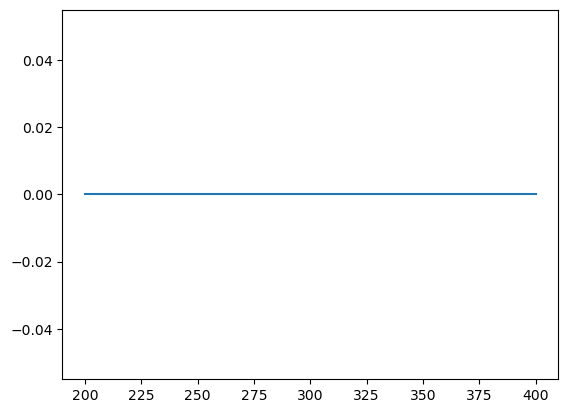

In [4]:
# Regular spiking neuron (RS) - no autapse
a = 0.02
b = 0.2
c = -65
d = 8

neuron = AQUA(a, b, c, d)

"""
# testing
neuron.Initialise(x_start, t_start)
I_test = np.zeros(N_iter)
I_test[steps_per_second] = 300
#X, T, spikes = neuron.update_RK2(dt, N_iter, I_test)
X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj[9])
split = np.arange(int(0.95*steps_per_second), int(1.2*steps_per_second), 1)
plt.plot(T[split], X[0, split])
"""


# stimulate the resonator at different frequencies.
# store whether a spike occurred? yep
spike_bool = test_frequencies(neuron, freq, dt, N_iter, x_start, t_start, I_inj)

plt.plot(freq, spike_bool)


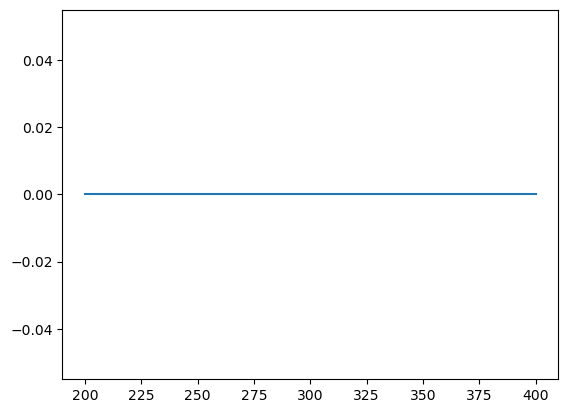

In [5]:
# Resgular spiking neuron (RS) - autapse
a = 0.02
b = 0.2
c = -65
d = 8

e = 0.3
f = 5
tau = 5

neuron2 = AQUA(a, b, c, d, e, f, tau)


# stimulate the resonator at different frequencies.
# store whether a spike occurred? yep
spike_bool2 = test_frequencies(neuron2, freq, dt, N_iter, x_start, t_start, I_inj)
    
plt.plot(freq, spike_bool2)